In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [31]:
img = nib.load("/mnt/jbrockma/bachelor-thesis/data/organ/media/nas/01_Datasets/CT/LITS/Training Batch 1/volume-0.nii")
img.shape

(512, 512, 75)

In [32]:
print(img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  75   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.00000e+00  7.03125e-01  7.03125e-01  5.00000e+00  0.00000e+00
  1.00000e+00  1.00000e+00  5.22410e+04]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'TE=0;sec=52241.0000;name='
aux_file        : b'!62ABDOMENNATIVUNDVENS'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d    

In [33]:
img_data = img.get_fdata()
img_data.shape

(512, 512, 75)

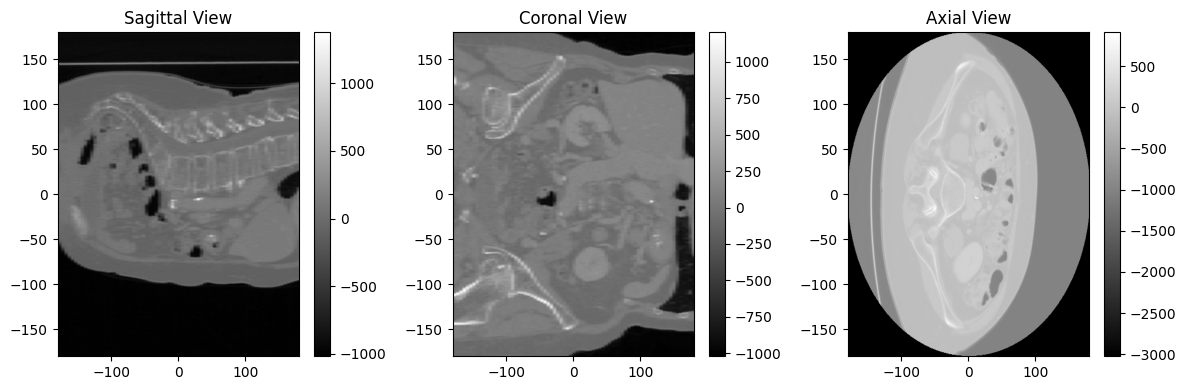

In [49]:
# Get the dimensions of the image
x_dim, y_dim, z_dim = img_data.shape
x_spacing, y_spacing, z_spacing = img.header.get_zooms()

# Calculate the extent of the image
extent = [
    -x_spacing * x_dim / 2,
    x_spacing * x_dim / 2,
    -y_spacing * y_dim / 2,
    y_spacing * y_dim / 2
]

# Choose the slice indices for the three orthogonal views
sagittal_slice = x_dim // 2
coronal_slice = y_dim // 2
axial_slice = z_dim // 2

# Plot the sagittal, coronal, and axial views using matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(img_data[sagittal_slice, :, :], cmap='gray', extent=extent, aspect='auto')
plt.title('Sagittal View')
plt.colorbar()

plt.subplot(132)
plt.imshow(img_data[:, coronal_slice, :], cmap='gray', extent=extent, aspect='auto')
plt.title('Coronal View')
plt.colorbar()

plt.subplot(133)
plt.imshow(img_data[:, :, axial_slice], cmap='gray', extent=extent, aspect='auto', origin='lower')
plt.title('Axial View')
plt.colorbar()

plt.tight_layout()
plt.show()